# PRECINT WITH HIGHEST SHOOTINGS IN 2021

In [98]:
import pandas as pd
df=pd.read_csv('NYPD_Shooting_Incident_Data__Year_To_Date_.csv')

In [99]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,225601140,03/13/2021,03:50:00,BROOKLYN,90,0,BAR/NIGHT CLUB,False,18-24,M,BLACK HISPANIC,25-44,M,BLACK,1001951,195081,40.702120,-73.936162,POINT (-73.93616159099997 40.70211956100008)
1,224817401,02/24/2021,16:40:00,MANHATTAN,25,0,NaN,False,18-24,M,WHITE HISPANIC,<18,M,BLACK,1001065,234582,40.810541,-73.939258,POINT (-73.93925822599994 40.81054144700005)
2,225295736,03/07/2021,06:15:00,BROOKLYN,75,0,NaN,False,25-44,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,1020123,187724,40.681871,-73.870662,POINT (-73.87066228999998 40.68187130500007)
3,223298156,01/12/2021,01:30:00,MANHATTAN,25,0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1000229,230967,40.800621,-73.942287,POINT (-73.942286832 40.80062081900007)
4,223240542,01/18/2021,10:04:00,BROOKLYN,79,0,NaN,False,NaN,NaN,NaN,45-64,M,BLACK,997994,188748,40.684744,-73.950446,POINT (-73.95044569599996 40.68474397000005)


In [100]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randn

# I am interested in determining where the most shootings occured from 2006 to 2018

# Would not filter for a duplicate set since each incident key would be a seperate incident.

In [103]:
import seaborn as sns

In [104]:
%matplotlib inline

In [105]:
!pip install ipyleaflet

# Would like to know which precint and borough might need "funding" in order to combat shootings/homicides
df.info()

<AxesSubplot:xlabel='BORO', ylabel='count'>

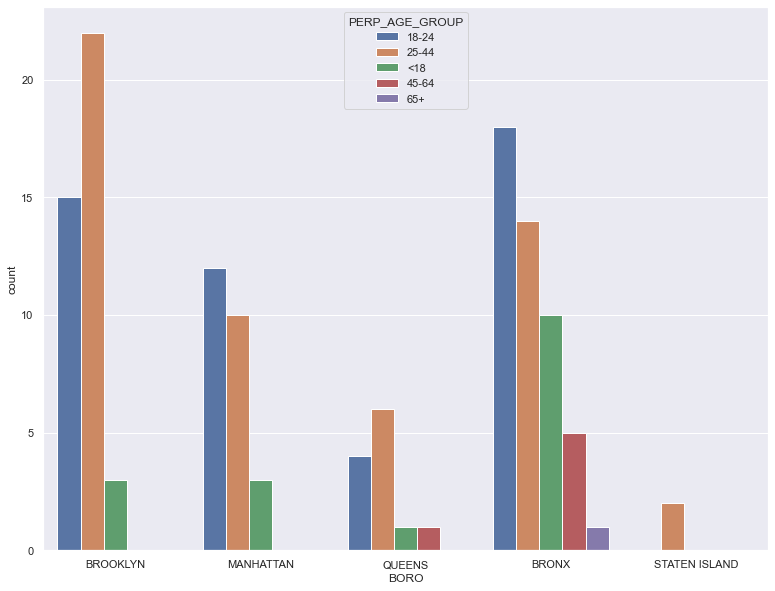

In [157]:
sns.countplot(x='BORO',hue='PERP_AGE_GROUP',data=df)

<AxesSubplot:xlabel='BORO', ylabel='count'>

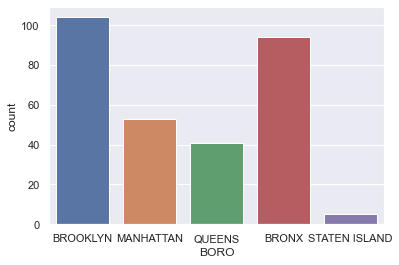

In [108]:
# The Graph shows that Brooklyn has the highest number of shootings With the Bronx following
# Even though it might not result in a homicide , shootings are done with lethal intentions
sns.countplot(x='BORO',data=df)

In [109]:
# I would like to focus on Brooklyn
df2=pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [110]:
df2.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056)
1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005)
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076)
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006)
4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003)


In [111]:
Brooklyn2021=df.loc[df['BORO']=='BROOKLYN']

In [112]:
Brooklyn2021.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,225601140,03/13/2021,03:50:00,BROOKLYN,90,0,BAR/NIGHT CLUB,False,18-24,M,BLACK HISPANIC,25-44,M,BLACK,1001951,195081,40.702120,-73.936162,POINT (-73.93616159099997 40.70211956100008)
2,225295736,03/07/2021,06:15:00,BROOKLYN,75,0,NaN,False,25-44,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,1020123,187724,40.681871,-73.870662,POINT (-73.87066228999998 40.68187130500007)
4,223240542,01/18/2021,10:04:00,BROOKLYN,79,0,NaN,False,NaN,NaN,NaN,45-64,M,BLACK,997994,188748,40.684744,-73.950446,POINT (-73.95044569599996 40.68474397000005)
11,226323779,03/30/2021,16:20:00,BROOKLYN,73,2,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005)
13,222990833,01/12/2021,22:12:00,BROOKLYN,69,0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,1012580,172896,40.641199,-73.897921,POINT (-73.89792064799997 40.64119909400005)


<AxesSubplot:xlabel='PRECINCT', ylabel='count'>

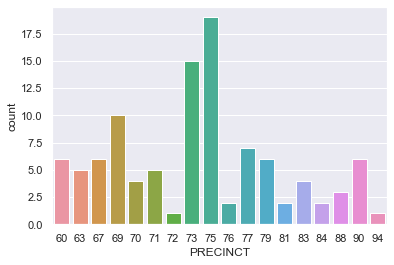

In [113]:
#From the Bar graph PRECINCT 75 has the most shootings, Location is East New York
sns.countplot(x='PRECINCT',data=Brooklyn2021)

In [114]:
#Im curious as to the trends of the 75th precint in the past
#BHS stands for Brooklyn Historical Shootings
BHS=df2.loc[df2['BORO']=='BROOKLYN']

In [115]:
BHS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 5 to 23567
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             9722 non-null   int64  
 1   OCCUR_DATE               9722 non-null   object 
 2   OCCUR_TIME               9722 non-null   object 
 3   BORO                     9722 non-null   object 
 4   PRECINCT                 9722 non-null   int64  
 5   JURISDICTION_CODE        9722 non-null   float64
 6   LOCATION_DESC            4285 non-null   object 
 7   STATISTICAL_MURDER_FLAG  9722 non-null   bool   
 8   PERP_AGE_GROUP           5744 non-null   object 
 9   PERP_SEX                 5754 non-null   object 
 10  PERP_RACE                5754 non-null   object 
 11  VIC_AGE_GROUP            9722 non-null   object 
 12  VIC_SEX                  9722 non-null   object 
 13  VIC_RACE                 9722 non-null   object 
 14  X_COORD_CD             

In [116]:
BHS.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
5,198255460,06/07/2019,17:50:00,BROOKLYN,73,0.0,NaN,False,45-64,M,WHITE HISPANIC,25-44,M,BLACK,1009650,186966,40.679827,-73.908425,POINT (-73.90842523899994 40.67982701600005)
6,194570529,03/11/2019,16:30:00,BROOKLYN,81,0.0,NaN,False,18-24,M,BLACK,25-44,M,BLACK,1001181,189778,40.687566,-73.938952,POINT (-73.93895197599994 40.68756556300008)
7,203211777,10/03/2019,01:45:00,BROOKLYN,67,0.0,MULTI DWELL - APT BUILD,True,NaN,NaN,NaN,25-44,M,BLACK,1004729,174146,40.644652,-73.926206,POINT (-73.92620615399994 40.64465170600005)
9,199582060,07/10/2019,02:56:00,BROOKLYN,69,0.0,NaN,False,25-44,M,BLACK,25-44,M,BLACK,1012579,175845,40.649293,-73.897912,POINT (-73.89791186799994 40.64929346200006)
12,205908100,12/02/2019,11:50:00,BROOKLYN,67,0.0,NaN,False,25-44,F,BLACK,25-44,M,BLACK,1004359,173694,40.643412,-73.927541,POINT (-73.92754078099995 40.64341191200003)


In [117]:
BHS.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
5,198255460,06/07/2019,17:50:00,BROOKLYN,73,0.0,NaN,False,45-64,M,WHITE HISPANIC,25-44,M,BLACK,1009650,186966,40.679827,-73.908425,POINT (-73.90842523899994 40.67982701600005)
6,194570529,03/11/2019,16:30:00,BROOKLYN,81,0.0,NaN,False,18-24,M,BLACK,25-44,M,BLACK,1001181,189778,40.687566,-73.938952,POINT (-73.93895197599994 40.68756556300008)
7,203211777,10/03/2019,01:45:00,BROOKLYN,67,0.0,MULTI DWELL - APT BUILD,True,NaN,NaN,NaN,25-44,M,BLACK,1004729,174146,40.644652,-73.926206,POINT (-73.92620615399994 40.64465170600005)
9,199582060,07/10/2019,02:56:00,BROOKLYN,69,0.0,NaN,False,25-44,M,BLACK,25-44,M,BLACK,1012579,175845,40.649293,-73.897912,POINT (-73.89791186799994 40.64929346200006)
12,205908100,12/02/2019,11:50:00,BROOKLYN,67,0.0,NaN,False,25-44,F,BLACK,25-44,M,BLACK,1004359,173694,40.643412,-73.927541,POINT (-73.92754078099995 40.64341191200003)


In [118]:
BHS['OCCUR_DATE'].value_counts()

09/05/2011    19
07/26/2020    19
07/05/2020    16
04/12/2010    16
09/04/2006    16
              ..
01/11/2009     1
08/11/2011     1
06/25/2016     1
03/01/2012     1
12/04/2009     1
Name: OCCUR_DATE, Length: 3845, dtype: int64

In [119]:
df2['OCCUR_DATE']=pd.to_datetime(df2['OCCUR_DATE'])

In [144]:
df2.sort_values(by=['OCCUR_DATE'])

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
17251,25801105,2006-01-01,0:25:00,BROOKLYN,75,0.0,BAR/NIGHT CLUB,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,1017953,185021,40.674461,-73.878500,POINT (-73.87849967499993 40.674460716000056)
12623,16692665,2006-01-01,21:42:00,BROOKLYN,75,0.0,NaN,False,25-44,M,WHITE,18-24,M,WHITE HISPANIC,1016056,186594,40.678785,-73.885331,POINT (-73.88533106599994 40.67878526100003)
18533,23588714,2006-01-01,0:30:00,BROOKLYN,75,0.0,NaN,False,18-24,M,BLACK,25-44,M,BLACK,1016973,174004,40.644225,-73.882086,POINT (-73.88208610299995 40.64422517400004)
10022,16631429,2006-01-01,17:11:00,BROOKLYN,75,0.0,NaN,False,UNKNOWN,M,UNKNOWN,18-24,M,BLACK,1016549,184991,40.674384,-73.883561,POINT (-73.88356133399996 40.67438360700004)
6088,11118234,2006-01-01,1:00:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,18-24,F,BLACK,1019419,182324,40.667052,-73.873229,POINT (-73.87322871599997 40.66705235800004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23311,217212136,2020-01-01,19:00:00,BROOKLYN,75,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1016506,176978,40.652390,-73.883755,POINT (-73.88375468599996 40.65238986700007)
23300,218321574,2020-01-01,08:40:00,BROOKLYN,75,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1006600,238545,40.821407,-73.919250,POINT (-73.91925016899995 40.82140650100007)
23287,215776333,2020-01-01,18:38:00,BROOKLYN,75,0.0,NaN,False,<18,M,WHITE HISPANIC,<18,M,BLACK,951232,170429,40.634411,-74.118962,POINT (-74.11896229899996 40.634411467000064)
23382,221795938,2020-01-01,16:00:00,BROOKLYN,75,0.0,NaN,False,NaN,NaN,NaN,25-44,F,BLACK,1008427,183518,40.670366,-73.912847,POINT (-73.91284696199995 40.670366460000025)


In [145]:
df2['OCCUR_DATE'] = pd.to_datetime(df2["OCCUR_DATE"].dt.strftime('%Y'))

<ipython-input-145-81eca92619d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['OCCUR_DATE'] = pd.to_datetime(df2["OCCUR_DATE"].dt.strftime('%Y'))


In [146]:
df2['OCCUR_DATE'].value_counts()

2020-01-01    136
2011-01-01    131
2007-01-01    125
2006-01-01    117
2009-01-01    110
2010-01-01    109
2008-01-01    100
2012-01-01     89
2015-01-01     81
2014-01-01     80
2013-01-01     78
2016-01-01     68
2019-01-01     66
2017-01-01     44
2018-01-01     33
Name: OCCUR_DATE, dtype: int64

In [147]:
df2.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
23559,215223441,2020-01-01,19:46:00,BROOKLYN,75,0.0,HOTEL/MOTEL,True,18-24,M,BLACK,18-24,M,BLACK,1008676,178766,40.657323,-73.911967,POINT (-73.91196656999993 40.65732259300006)
22191,220463385,2020-01-01,23:03:00,BROOKLYN,75,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1001329,187143,40.680333,-73.938425,POINT (-73.93842499899995 40.68033280500004)
22332,221423369,2020-01-01,13:20:00,BROOKLYN,75,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1005064,243644,40.835406,-73.924784,POINT (-73.92478396599995 40.83540554900002)
22324,215776333,2020-01-01,18:38:00,BROOKLYN,75,0.0,NaN,True,18-24,M,WHITE HISPANIC,<18,M,BLACK HISPANIC,1007580,235710,40.813623,-73.915719,POINT (-73.91571925399995 40.813622691000035)
22301,215254842,2020-01-01,13:09:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,981369,173656,40.643330,-74.010383,POINT (-74.01038280899998 40.64332996700006)


In [148]:
df2=df2.loc[df2['PRECINCT']==75]

In [149]:
df2.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
23559,215223441,2020-01-01,19:46:00,BROOKLYN,75,0.0,HOTEL/MOTEL,True,18-24,M,BLACK,18-24,M,BLACK,1008676,178766,40.657323,-73.911967,POINT (-73.91196656999993 40.65732259300006)
22191,220463385,2020-01-01,23:03:00,BROOKLYN,75,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1001329,187143,40.680333,-73.938425,POINT (-73.93842499899995 40.68033280500004)
22332,221423369,2020-01-01,13:20:00,BROOKLYN,75,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1005064,243644,40.835406,-73.924784,POINT (-73.92478396599995 40.83540554900002)
22324,215776333,2020-01-01,18:38:00,BROOKLYN,75,0.0,NaN,True,18-24,M,WHITE HISPANIC,<18,M,BLACK HISPANIC,1007580,235710,40.813623,-73.915719,POINT (-73.91571925399995 40.813622691000035)
22301,215254842,2020-01-01,13:09:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,981369,173656,40.643330,-74.010383,POINT (-74.01038280899998 40.64332996700006)


In [150]:
df2['OCCUR_DATE'].value_counts()

2020-01-01    136
2011-01-01    131
2007-01-01    125
2006-01-01    117
2009-01-01    110
2010-01-01    109
2008-01-01    100
2012-01-01     89
2015-01-01     81
2014-01-01     80
2013-01-01     78
2016-01-01     68
2019-01-01     66
2017-01-01     44
2018-01-01     33
Name: OCCUR_DATE, dtype: int64

In [151]:
sns.set(rc={'figure.figsize':(13,10)})

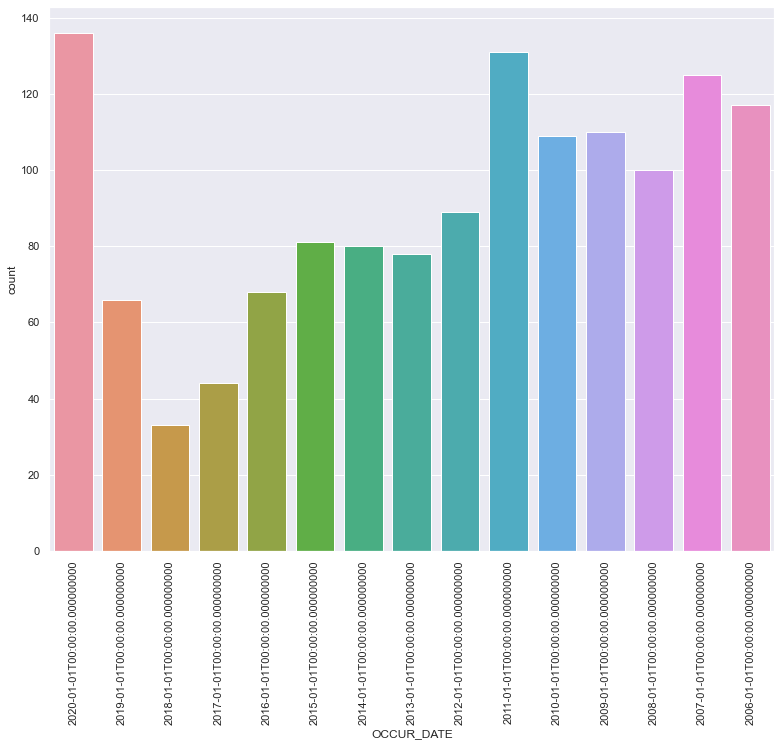

In [155]:
Shooting_Freq_75th=sns.countplot(x='OCCUR_DATE',data=df2)
for item in Shooting_Freq_75th.get_xticklabels():
    item.set_rotation(90)

#SHOOTINGS IN THE 75TH PRECINCT WERE ON A STEADY DECLINE UNTIL 2020. WE CAN SEE THAT 2020 HAS BEEN THE PRECINCTS' MOST VIOLENT YEAR SINCE 2006.
#FUNDS AND RESOURCES SHOULD BE ALLOCATED TOWARDS THIS PRECINT TO COMBAT THIS INCREASE IN SHOOTING VIOLENCE.